- Nome: Sophia Kerber Shigueoka
- Turma: 2A

Dados das pesquisas dos países: 
https://www.un.org/en/development/desa/population/migration/data/estimates2/estimates15.asp
https://economia.uol.com.br/noticias/bbc/2018/09/11/a-crise-economica-da-argentina-em-6-graficos.htm
https://www.bbc.com/news/world-latin-america-19652436
https://www.aljazeera.com/news/2018/09/argentina-crisis-wrong-180914154523757.html

##### Introdução: 
Escolhi o Mercosul como objeto de estudo uma vez que o Brasil faz parte desta organição. Assim, imaginei que seria mais fácil formular as hipóteses e entender os dados de acordo com momentos históricos que conheço sobre o bloco e sobre o país. Para fins de comparação, uitlizarei dois grupos de países, de modo que um é composto de membros do mercosul e o outro não. Também é interessante ressaltar que, como minha pergunta envolve crises econômicas, faz sentido utilizar o Mercosul como bloco economico, já que dois países se encontram em crises graves, cujas datas de início são bem definidas.
<br>
<br>
##### Países que fazem parte do Mercosul (contando a Venezuela, embora tenha sido suspensa em 2016):
- Brasil
- Venezuela (até 2016)
- Argentina
- Paraguai
- Uruguai

##### Pergunta: 
O que acontece com os níveis de imigração dos demais membros do Mercosul quando um país membro entra em algum tipo de crise? Especificamente, o que acontece com os níveis de imigração dos membros quando a Venezuela e Argentina entram em uma situação econômica difícil?

##### Hipotese: 
Os níveis de imigração aumentam principalmente nos países do Mercosul.

#### Observação: meu rascunho não está de acordo com este arquivo, já que tive que mudar minha hipótese quando o projeto já estava em desenvolvimento.

##### Mecanismo:
   Imaginei que, primeiramente, como o Mercosul é um bloco que trabalha visando a livre circulação de bens e pessoas, seria provável que, ao considerar países de destino, um imigrante pensasse primeiramente nos países próximos tanto diplomaticamente quanto geograficamente. Além disso, os países do Mercosul também tem o fator da proximidade, o que facilita a migração, e a barreira linguística não é tão forte.
<br>
<br>
    Futuramente, seria interessante também observar a correlação destas duas variáveis, de modo a tentar provar que as duas estão relacionadas.

#### 1. Importando bibliotecas

In [510]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors

#### 2. Referenciando arquivos de excel

In [511]:
dens_pop = pd.read_excel('en_pop_dnst.xlsx')
gdp = pd.read_excel('gdp_total_yearly_growth.xlsx')
migrants = pd.read_excel('UN_MigrantStockTotal_2017.xlsx')
# Todas as sheets abaixo tem país de destino e de origem
migrants1990 = pd.read_excel('origemdestinow.xlsx')
migrants1995 = pd.read_excel('origemdestino1995.xlsx')
migrants2000 = pd.read_excel('origemdestino2000.xlsx')
migrants2005 = pd.read_excel('origemdestino2005.xlsx')
migrants2010 = pd.read_excel('origemdestino2010.xlsx')
migrants2015 = pd.read_excel('origemdestino2015.xlsx')
pop = pd.read_excel('population_total.xlsx')
debt = pd.read_excel('debt_to_foreigners_by_public_and_private_percent_of_gni.xlsx')

#### 3. Mudando os índices dos dataframes, para que o 'loc' seja mais fácil

In [512]:
dens_pop.set_index("country", inplace=True)
gdp.set_index("country", inplace=True)
migrants.set_index('Major area, region, country or area of destination', inplace = True)
pop.set_index("country", inplace=True)
debt.set_index("country", inplace=True)
migrants1990.set_index("Area of Destination", inplace = True) 
#migrants1995.set_index("Area of Destination", inplace = True) 
migrants2000.set_index("Area of Destination", inplace = True) 
migrants2005.set_index("Area of Destination", inplace = True) 
migrants2010.set_index("Area of Destination", inplace = True) 
migrants2015.set_index("Area of Destination", inplace = True)

## Grupo de países do Mercosul (contando a Venezuela)

In [ ]:
p_mercosul = ['Brazil', 'Venezuela (Bolivarian Republic of)', 'Argentina', 'Paraguay', 'Uruguay']

## Grupo Controle

Como o gráfico de conclusão que eu plotei já continha mais países do que os participantes do mercosul, não achei necessário criar um grupo especificamente para controle.

### ANÁLISE DE DADOS - MIGRAÇÕES E POPULAÇÃO

## 1. Densidade Populacional

In [178]:
dens_pop.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14.00,14.30,14.60,14.90,15.30,15.60,15.90,16.30,16.70,17.10,...,43.5,44.7,46.1,47.7,49.4,51.1,52.7,54.2,55.6,56.9
Albania,60.60,62.50,64.30,66.20,68.10,69.90,71.70,73.80,76.00,77.90,...,107.0,106.0,106.0,106.0,106.0,105.0,105.0,105.0,105.0,105.0
Algeria,4.76,4.88,5.00,5.13,5.27,5.42,5.57,5.74,5.90,6.07,...,14.8,15.1,15.4,15.7,16.0,16.3,16.7,17.0,17.4,17.7
Andorra,30.60,32.70,34.90,37.20,39.50,41.80,44.20,46.60,49.10,51.70,...,180.0,180.0,178.0,175.0,172.0,169.0,166.0,164.0,164.0,164.0
Angola,4.44,4.50,4.56,4.60,4.63,4.64,4.63,4.63,4.65,4.72,...,18.1,18.7,19.4,20.1,20.9,21.6,22.4,23.1,23.9,24.7


###### Decidi, antes de plotar a população, plotar a densidade populacional e observar os resultados. Embora não tenha escolhido um grupo controle para o projeto inteiro, plotei a densidade de outro grupo, composto por países desenvolvidos, uma vez que a diferença é notável e pode influenciar nas minhas conclusões.

In [102]:
ms1 = dens_pop.loc['Venezuela']
ms2 = dens_pop.loc['Brazil']
ms3 = dens_pop.loc['Uruguay']
ms4 = dens_pop.loc['Paraguay']
ms5 = dens_pop.loc['Argentina']
cg1 = dens_pop.loc['Japan']
cg2 = dens_pop.loc['Germany']
cg3 = dens_pop.loc['United Kingdom']
cg4 = dens_pop.loc['United States']

Mercosul

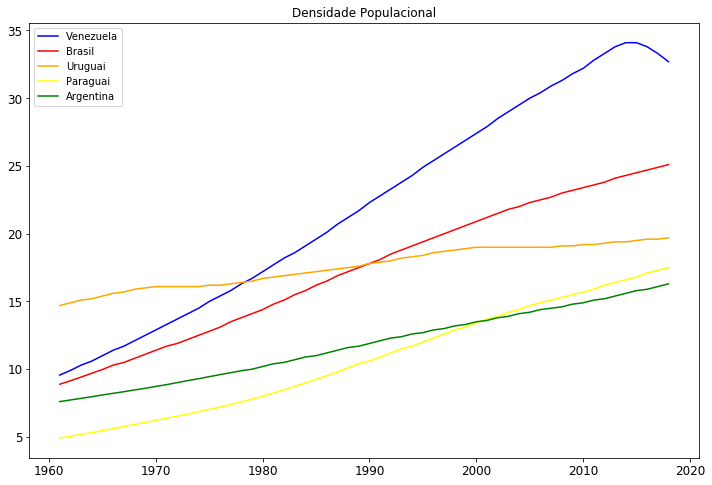

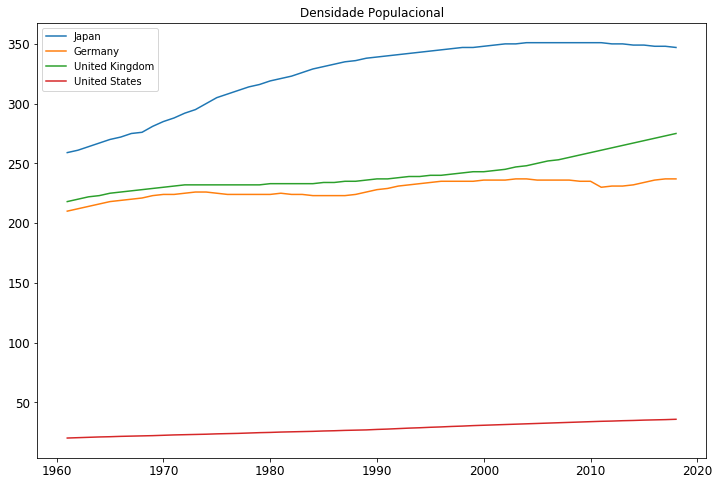

In [144]:
ms1.plot(color = 'blue', label='Venezuela', title ="Densidade Populacional",figsize=(12,8),legend=True, fontsize=12)
ms2.plot(color = 'red', label='Brasil')
ms3.plot(color = 'orange', label='Uruguai')
ms4.plot(color = 'yellow', label='Paraguai')
ms5.plot(color = 'green', label='Argentina')
plt.legend(loc='upper left')
plt.show()
cg1.plot(title ="Densidade Populacional",figsize=(12,8),legend=True, fontsize=12)
cg2.plot()
cg3.plot()
cg4.plot()
plt.legend(loc='upper left')
plt.show()

## 2. População

Os dados utilzados abrangem muitos anos, e vão além, fazendo também previsões. Apesar disso, é possível observar o crescimento do população.

In [180]:
ms1p = pop.loc['Venezuela']
ms2p = pop.loc['Brazil']
ms3p = pop.loc['Uruguay']
ms4p = pop.loc['Paraguay']
ms5p = pop.loc['Argentina']
cg1p = pop.loc['Japan']
cg2p = pop.loc['Germany']
cg3p = pop.loc['United Kingdom']
cg4p = pop.loc['United States']

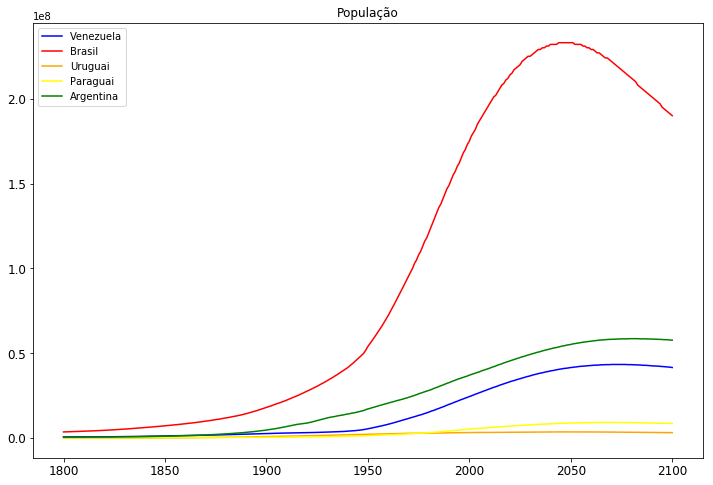

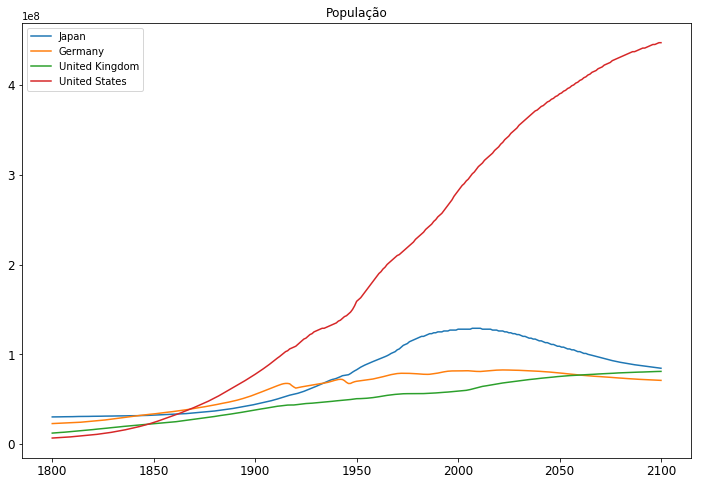

In [272]:
ms1p.plot(color = 'blue', label='Venezuela', title ="População",figsize=(12,8),legend=True, fontsize=12)
ms2p.plot(color = 'red', label='Brasil')
ms3p.plot(color = 'orange', label='Uruguai')
ms4p.plot(color = 'yellow', label='Paraguai')
ms5p.plot(color = 'green', label='Argentina')
plt.legend(loc='upper left')
plt.show()
cg1p.plot(title ="População",figsize=(12,8),legend=True, fontsize=12)
cg2p.plot()
cg3p.plot()
cg4p.plot()
plt.legend(loc='upper left')
plt.show()

## 3. Migração

In [276]:
migrants_od.tail(60)

,,,,,Total,Other North,Other South,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
206,Turks and Caicos Islands,NaN,796,B,5062.0,348.0,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,United States Virgin Islands,NaN,850,B,51970.0,3531.0,4427.0,NaN,NaN,NaN,NaN,NaN,NaN,1113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,Central America,NaN,916,NaN,1829911.0,1820.0,211562.0,52.0,2.0,141.0,0.0,0.0,43.0,0.0,...,1789.0,1.0,0.0,3569.0,88.0,0.0,0.0,13.0,0.0,2.0
209,Belize,NaN,84,B R,30404.0,202.0,888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,Costa Rica,NaN,188,B R,417628.0,530.0,207798.0,25.0,2.0,44.0,NaN,NaN,4.0,NaN,...,252.0,1.0,NaN,1030.0,2.0,NaN,NaN,NaN,NaN,2.0
211,El Salvador,NaN,222,B R,47360.0,61.0,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,NaN,NaN,258.0,NaN,NaN,NaN,NaN,NaN,NaN
212,Guatemala,NaN,320,B R,264257.0,28.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.0,NaN,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN
213,Honduras,NaN,340,B R,270423.0,57.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN
214,Mexico,NaN,484,B R,695674.0,495.0,1425.0,NaN,NaN,47.0,NaN,NaN,39.0,NaN,...,1113.0,NaN,NaN,1460.0,81.0,NaN,NaN,NaN,NaN,NaN
215,Nicaragua,NaN,558,B R,41421.0,389.0,920.0,27.0,NaN,50.0,NaN,NaN,NaN,NaN,...,11.0,NaN,NaN,146.0,NaN,NaN,NaN,13.0,NaN,NaN


#### Selecionando as linhas por país, não por região

In [506]:
res_migrants1 = migrants1990.iloc[8:]
res_migrants1.head(10)
res_migrants2 = migrants2005.iloc[8:]
res_migrants3 = migrants2000.iloc[8:] 
res_migrants4 = migrants2010.iloc[8:]
res_migrants5 = migrants2015.iloc[8:]

#mig_merge_col = pd.merge(res_migrants1, res_migrants2, on='Area of Destination', how='outer')

#### Selecionando as colunas da imigração entre países do Mercosul - mesmo não tendo restringindo tanto, já é o suficiente para extrair as informações necessárias.

In [519]:
graph1 = res_migrants1.loc[p_mercosul]
graph2 = res_migrants2.loc[p_mercosul]
graph3 = res_migrants3.loc[p_mercosul]
graph4 = res_migrants4.loc[p_mercosul]
graph5 = res_migrants5.loc[p_mercosul]

É possível observar que conforme a crise se intensifica, as taxas de migração aumentam.

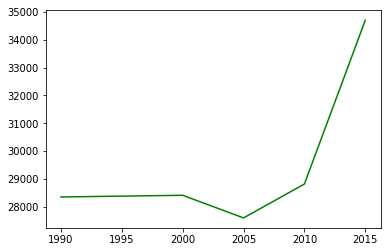

In [559]:
a = graph1.loc['Brazil']['Argentina']
b = graph2.loc['Brazil']['Argentina']
c = graph3.loc['Brazil']['Argentina']
d = graph4.loc['Brazil']['Argentina']
e = graph5.loc['Brazil']['Argentina']

list_ = [a, b, c, d, e]
listt = [1990, 2000, 2005, 2010, 2015]

comp = plt.plot(listt, list_, 'g') 

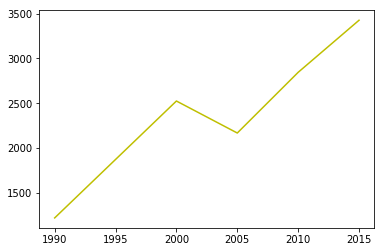

In [541]:
a2 = graph1.loc['Brazil']['Venezuela (Bolivarian Republic of)']
b2 = graph2.loc['Brazil']['Venezuela (Bolivarian Republic of)']
c2 = graph3.loc['Brazil']['Venezuela (Bolivarian Republic of)']
d2 = graph4.loc['Brazil']['Venezuela (Bolivarian Republic of)']
e2 = graph5.loc['Brazil']['Venezuela (Bolivarian Republic of)']

list_2 = [a2, b2, c2, d2, e2]

plt.plot(listt, list_2, 'y') 

Verificar se pode haver alguma correlação entre a população que sai da Venezuela e da Argentina para cada ano da tabela (1990, 1995, 2000, 2005, 2010, 2015)

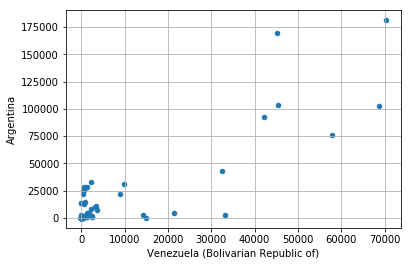

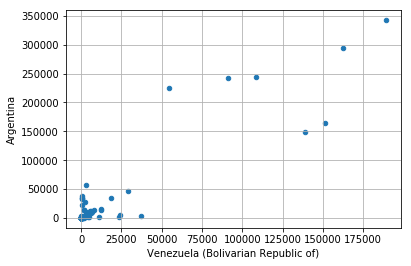

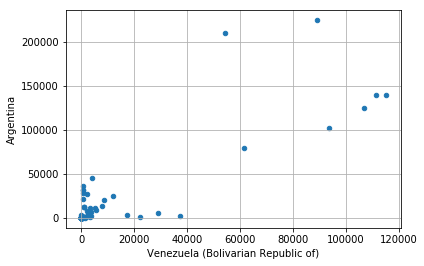

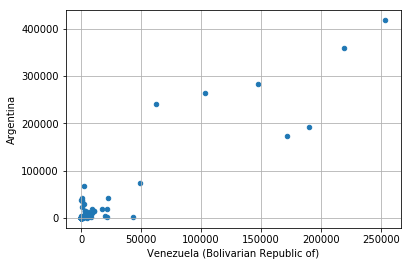

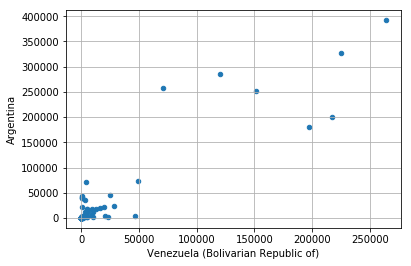

In [509]:
res_migrants1.plot.scatter('Venezuela (Bolivarian Republic of)', 'Argentina')
plt.grid(True)
res_migrants2.plot.scatter('Venezuela (Bolivarian Republic of)', 'Argentina')
plt.grid(True)
res_migrants3.plot.scatter('Venezuela (Bolivarian Republic of)', 'Argentina')
plt.grid(True)
res_migrants4.plot.scatter('Venezuela (Bolivarian Republic of)', 'Argentina')
plt.grid(True)
res_migrants5.plot.scatter('Venezuela (Bolivarian Republic of)', 'Argentina')
plt.grid(True)

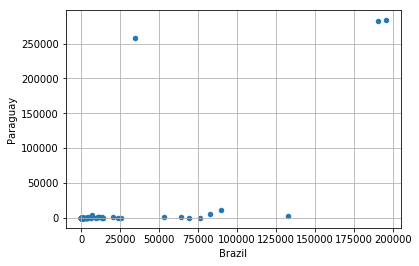

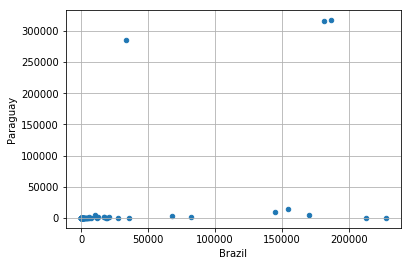

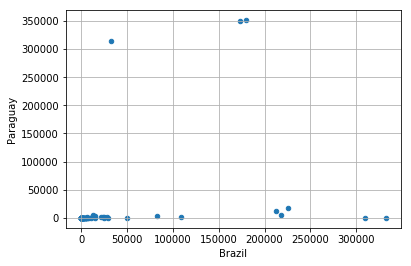

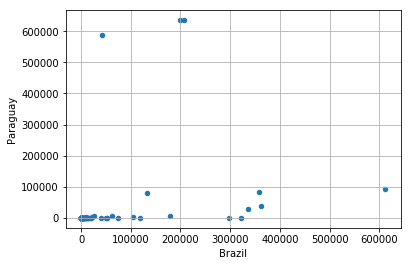

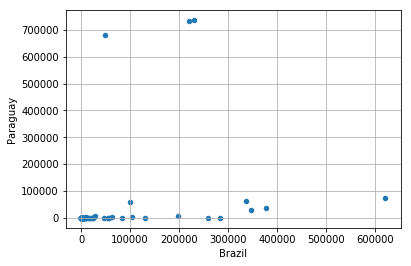

In [441]:
res_migrants1.plot.scatter('Brazil', 'Paraguay')
plt.grid(True)
res_migrants2.plot.scatter('Brazil', 'Paraguay')
plt.grid(True)
res_migrants3.plot.scatter('Brazil', 'Paraguay')
plt.grid(True)
res_migrants4.plot.scatter('Brazil', 'Paraguay')
plt.grid(True)
res_migrants5.plot.scatter('Brazil', 'Paraguay')
plt.grid(True)

## 4. ECONOMIA 

Juntar os dados da economia (picos de crise) com a tabela de migração - Para observarmos melhores resultados, utilizarei a Argentina e a Venezuela, que se encontram em crise.

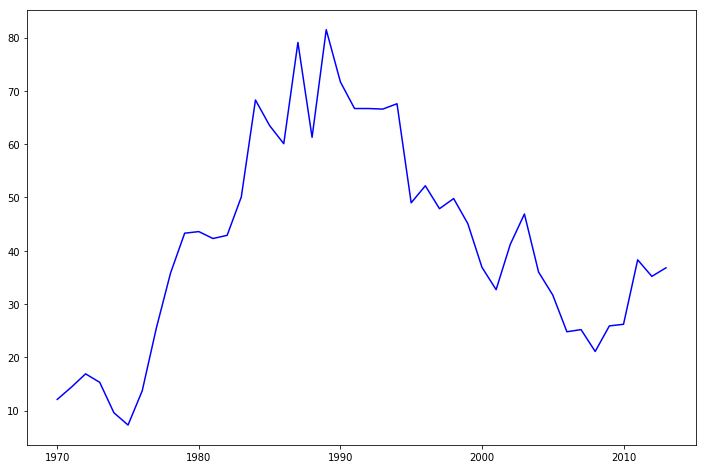

In [571]:
debt_years = debt.iloc[80:]
debt_va = debt_years.loc['Venezuela']
debt_va.plot(color = 'blue', figsize = (12, 8))

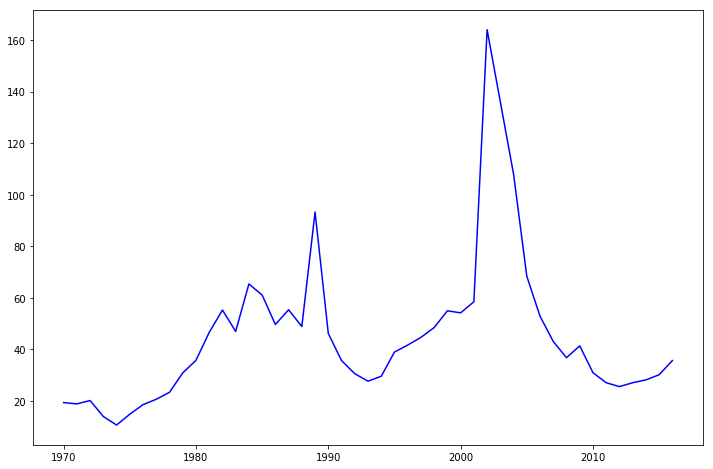

In [572]:
debt_vb = debt.loc['Argentina']
debt_vb.plot(color = 'blue', figsize = (12, 8))

# COMPARAÇÃO

## COMPARAÇÃO COM A VENEZUELA

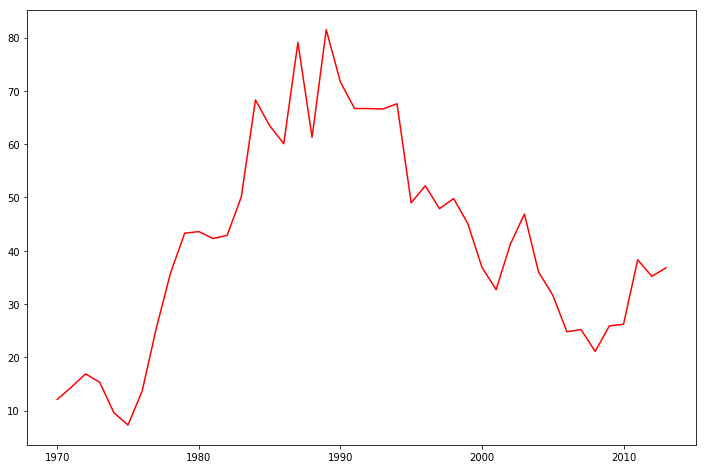

In [562]:
debt_va.plot(color = 'red', figsize = (12, 8))

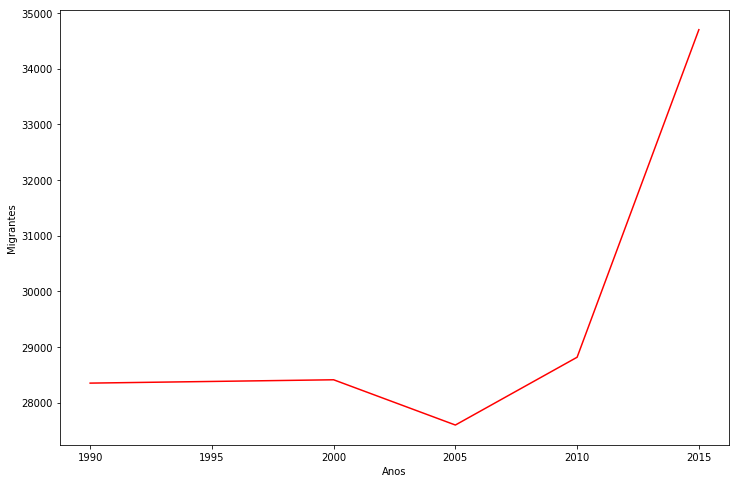

In [569]:
plt.figure(figsize=(12,8))
plt.xlabel('Anos')
plt.ylabel('Migrantes')
plt.plot(listt, list_, 'r') 
plt.show()

É possível observar que a partir do momento que a economia começa a entrar em declínio, a migração começa a aumentar.

## COMPARAÇÃO COM A ARGENTINA

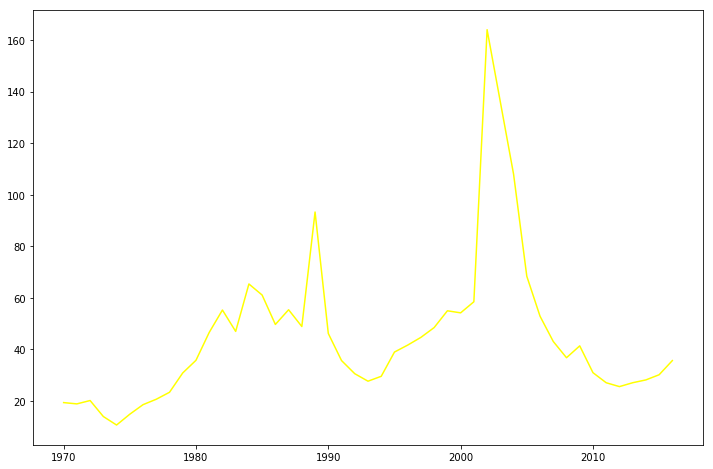

In [573]:
debt_vb = debt.loc['Argentina']
debt_vb.plot(color = 'yellow', figsize = (12, 8))

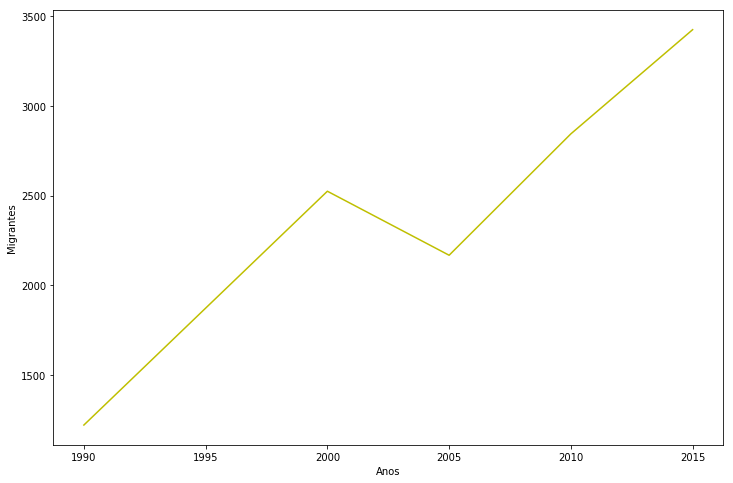

In [574]:
plt.figure(figsize=(12,8))
plt.xlabel('Anos')
plt.ylabel('Migrantes')
plt.plot(listt, list_2, 'y') 
plt.show()

Neste gráfico chega-se a mesma conclusão: quando a economia piora, a imigração aumenta.

## CORRELAÇÃO

In [594]:
corre = graph3[['Argentina','Brazil']]

In [595]:
correlation = corre.corr(method='pearson')
print(correlation)

           Argentina    Brazil
Argentina   1.000000  0.989143
Brazil      0.989143  1.000000


## CONCLUSÃO: 
#### A partir dos dados coletados, parece que há, de fato alguma correlação entre as crises nos países do mercosul e a migração direcionada aos demais membros. Seria necessária uma análise mais aprofundada para confirmar com certeza a hipótese, mas pelos dados coletados, a conclusão a que se chega é de que a hipótese inicial estava correta. Para obter resultados mais concretos, seria recomendável testar a hipótese com mais países.
